# PRINCIPAL COMPONENT ANALYSIS

principal component analysis is a dimentionality reduction method for a large data set. It transforms large number
of variables to smaller number of variables kepping information intact. 

It also allows you to summarize the large data into smaller no.of variables that can be easily visualized and analyzed.
Further you can applies this transformed data  in model building and and draw some accurate results. 

PCA's are perpandicular to each other, hence there is no multicolinearity in between them, they are uncorrelated.
First component always capture maximum amount of information from the data set and rest is grabed by 
second and third component. 

PCA are also used for masking of the important data from others for security purpose.(variables which are important but 
we dont want to show them to other person, we can use PCA by  keepig information intact as well as masking of the data )

# Importing libraries

In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Q.

Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve)

and obtain optimum number of clusters and check whether we have obtained same number of clusters
 with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


# Reading the data

In [2]:
df=pd.read_csv(r"C:\Users\ABC\Downloads\wine.csv")

In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


There are no missing values in data set 

In [5]:
# target class dropping for now 
df.drop(["Type"],inplace= True,axis=1)

In [6]:
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
df.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
map=df.corr()
map

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


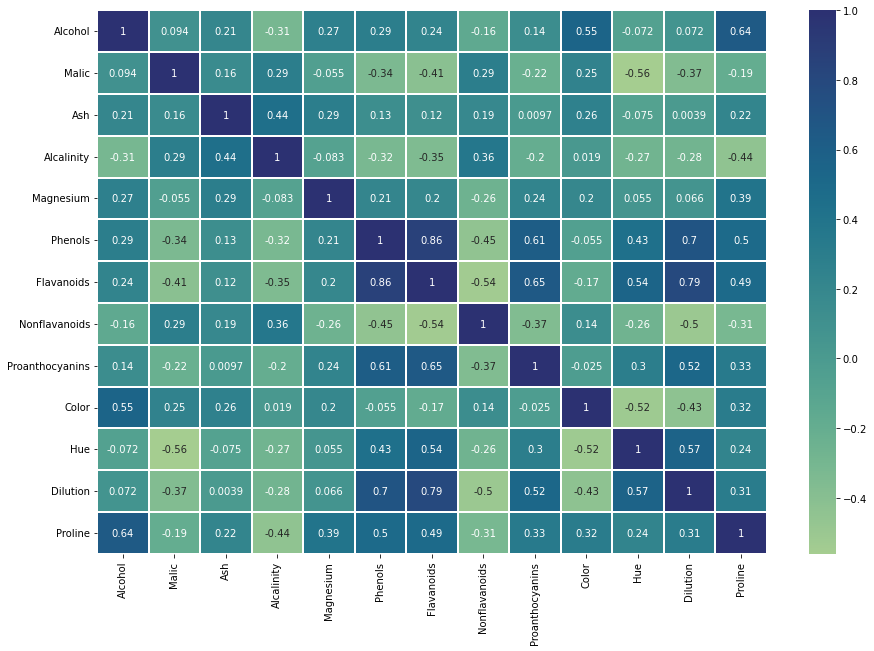

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(map,annot=True,linewidths=2,cmap= 'crest')
plt.show()

form above plot we can say that,phenols and flavanoids are almost 70 to 80 % correlated to 
dilutation,also they both are correlated to proanthocyanins upto 60-65 % and rest are no correlated that in that much percentage

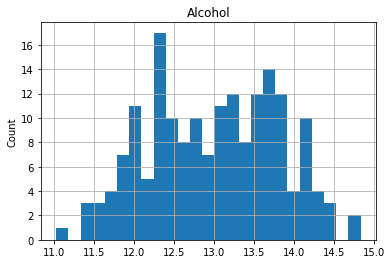

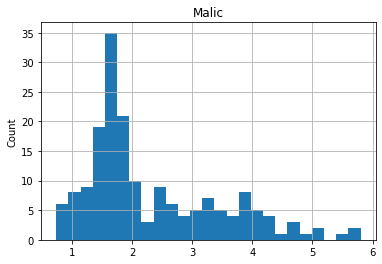

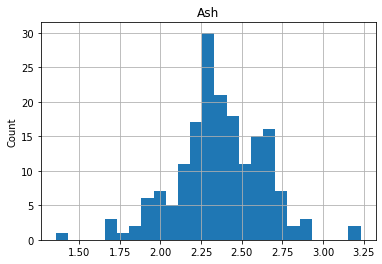

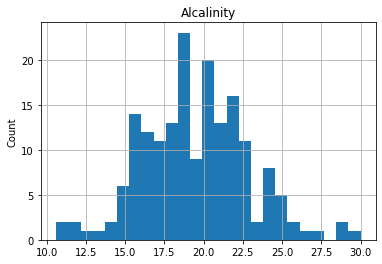

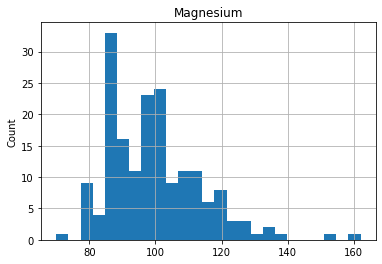

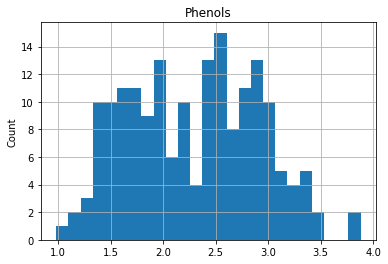

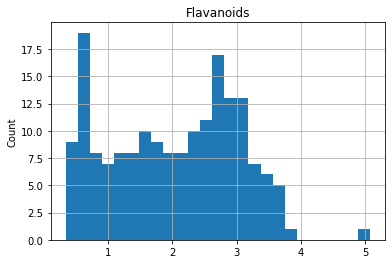

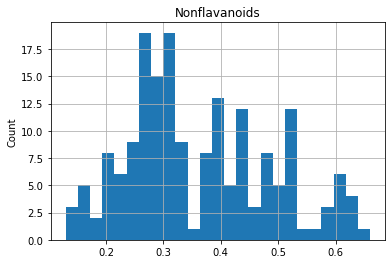

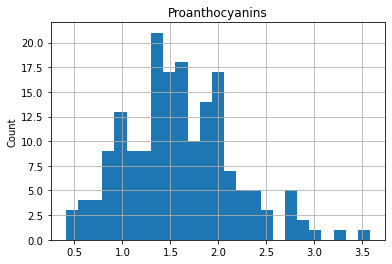

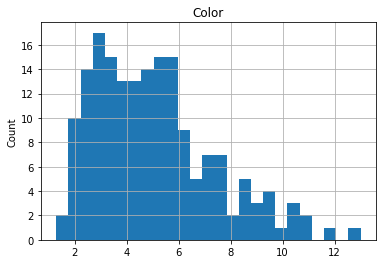

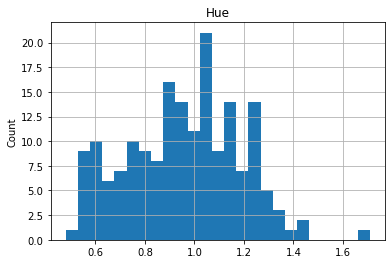

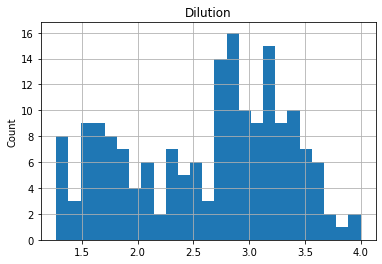

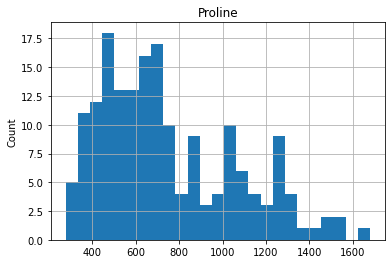

In [10]:
#checking distribution for all variable with histogram

for feature in df.columns:
    data=df
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Alcohol


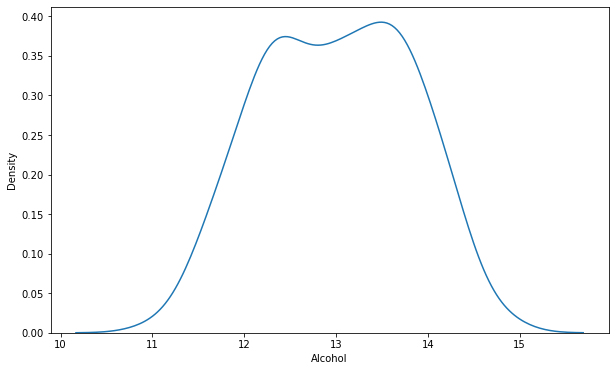

Malic


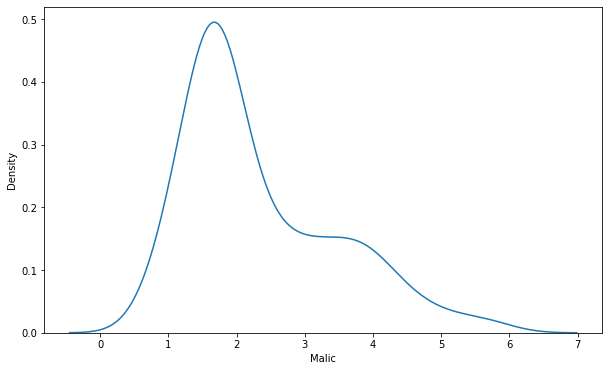

Ash


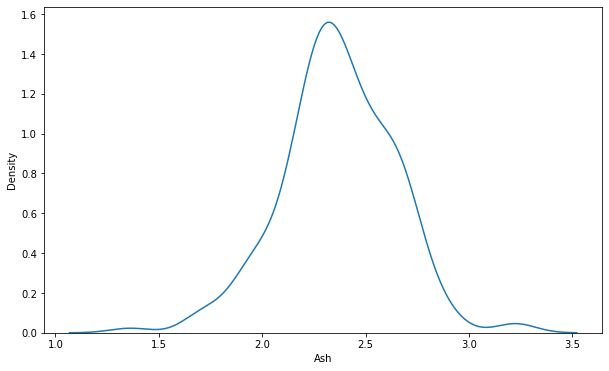

Alcalinity


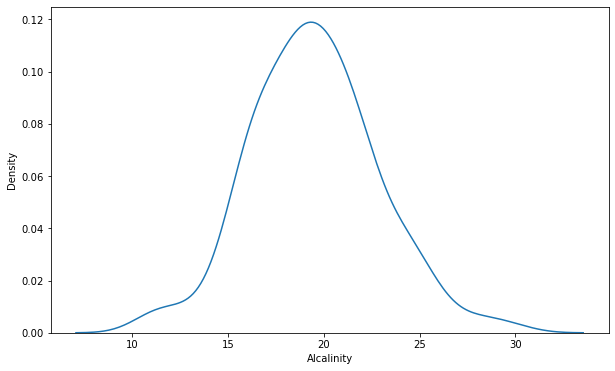

Magnesium


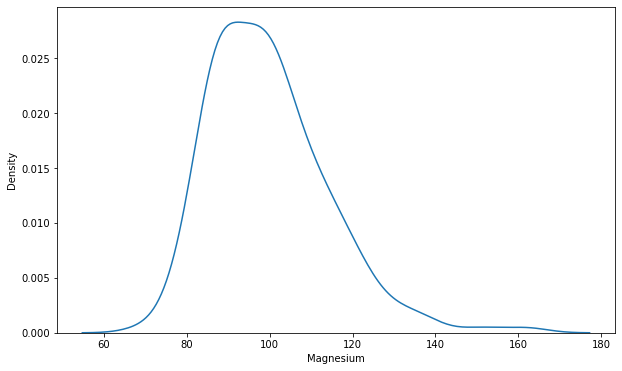

Phenols


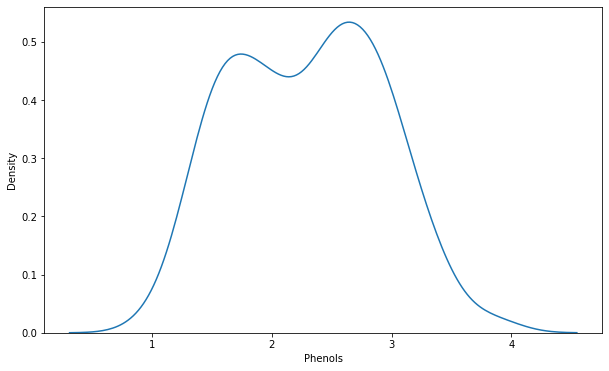

Flavanoids


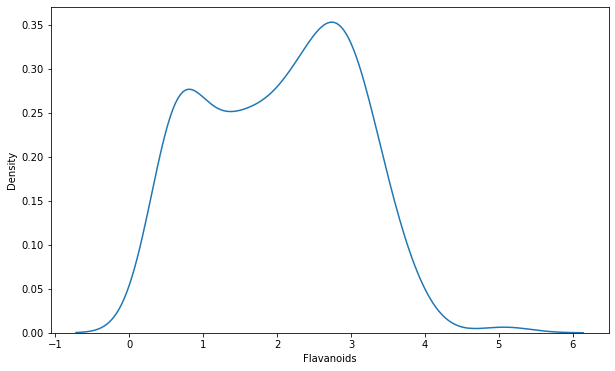

Nonflavanoids


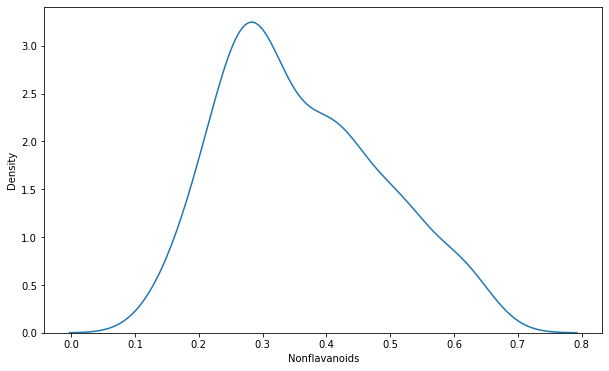

Proanthocyanins


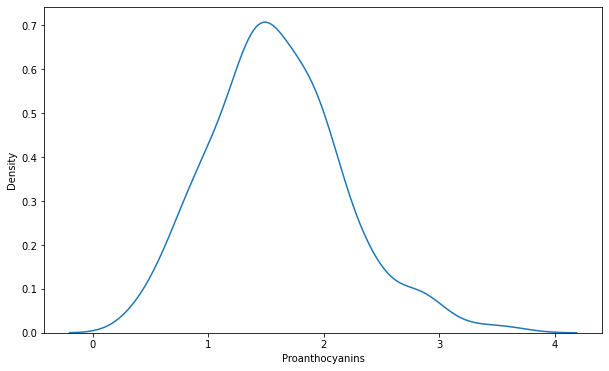

Color


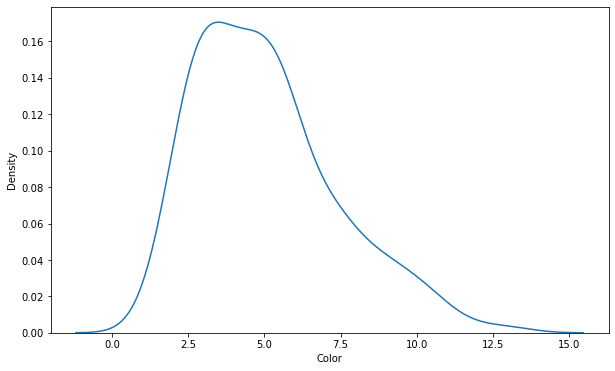

Hue


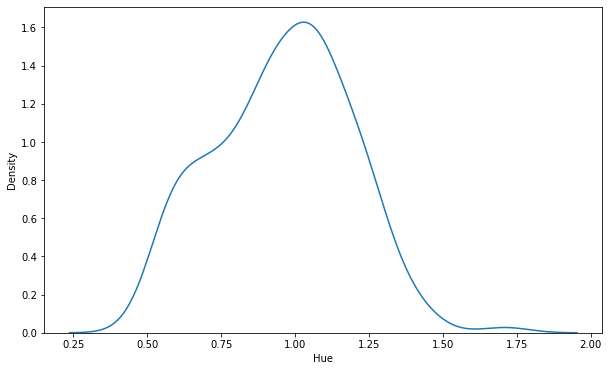

Dilution


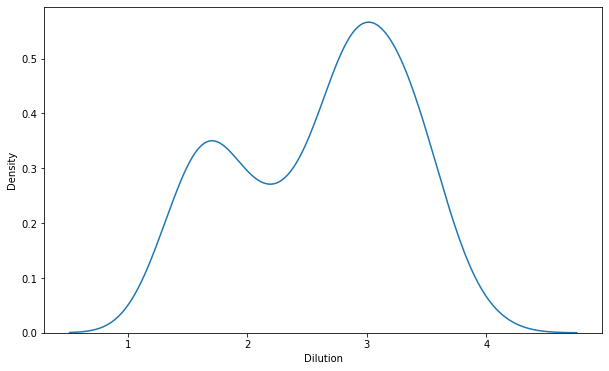

Proline


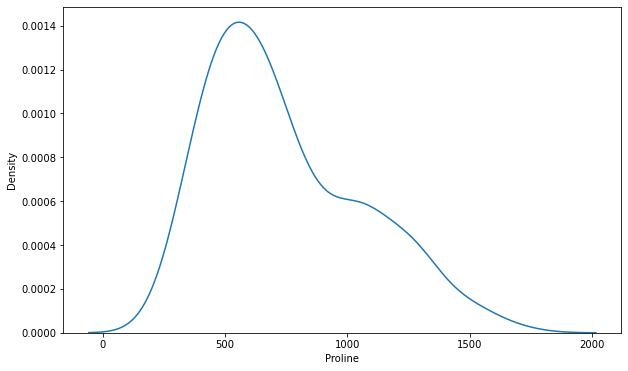

In [11]:
# checking with kernal density plot
for n in df.columns:
    plt.figure(figsize=(10,6))
    print(n)
    sns.kdeplot(data[n])
    plt.show()

most of the distribution seems to be normally distributed and some are skewed 

Alcohol          AxesSubplot(0.125,0.125;0.168478x0.755)
Malic         AxesSubplot(0.327174,0.125;0.168478x0.755)
Ash           AxesSubplot(0.529348,0.125;0.168478x0.755)
Alcalinity    AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

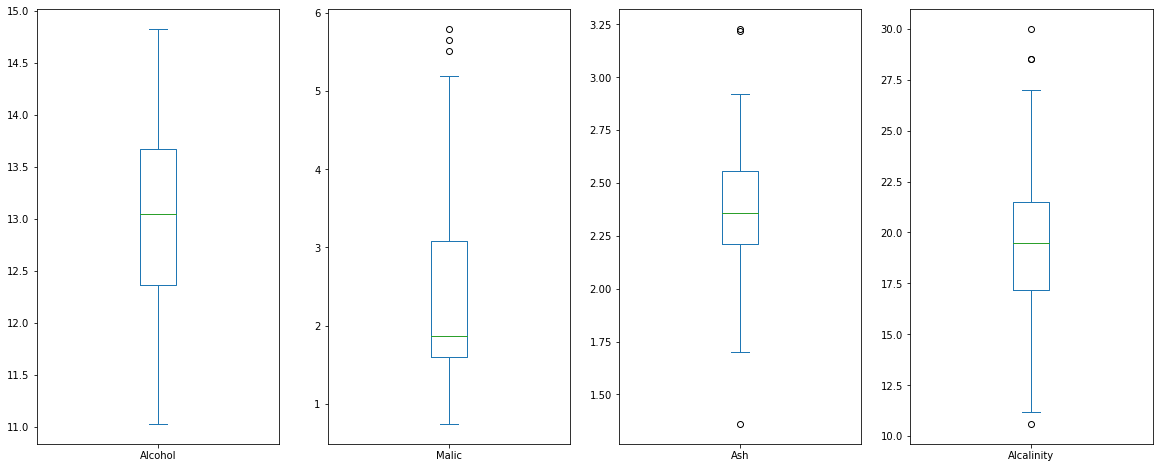

In [12]:
# checking for outliars with boxplot for each variable

df.iloc[:,[0,1,2,3]].plot(kind='box',figsize=(20,8),fontsize=10,subplots=True,sharex=False)

Magnesium           AxesSubplot(0.125,0.125;0.168478x0.755)
Phenols          AxesSubplot(0.327174,0.125;0.168478x0.755)
Flavanoids       AxesSubplot(0.529348,0.125;0.168478x0.755)
Nonflavanoids    AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

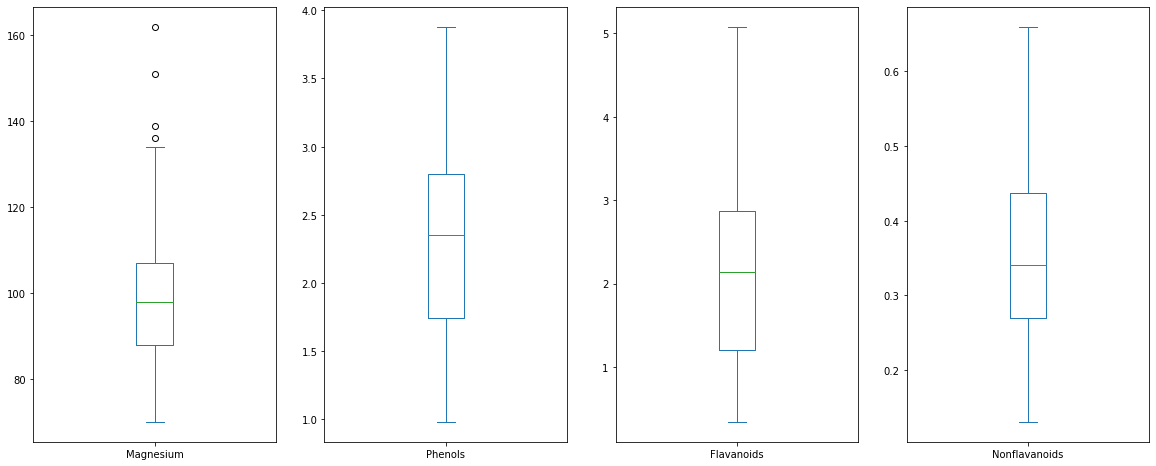

In [13]:
df.iloc[:,[4,5,6,7]].plot(kind='box',figsize=(20,8),fontsize=10,subplots=True,sharex=False)

Proanthocyanins       AxesSubplot(0.125,0.125;0.227941x0.755)
Color              AxesSubplot(0.398529,0.125;0.227941x0.755)
Hue                AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

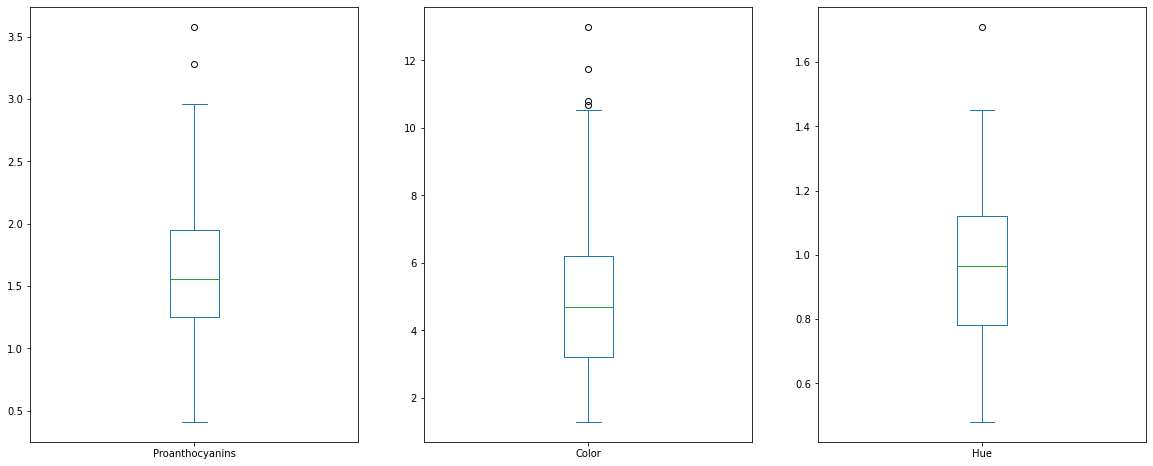

In [14]:
df.iloc[:,[8,9,10]].plot(kind='box',figsize=(20,8),fontsize=10,subplots=True,sharex=False)

Dilution       AxesSubplot(0.125,0.125;0.352273x0.755)
Proline     AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

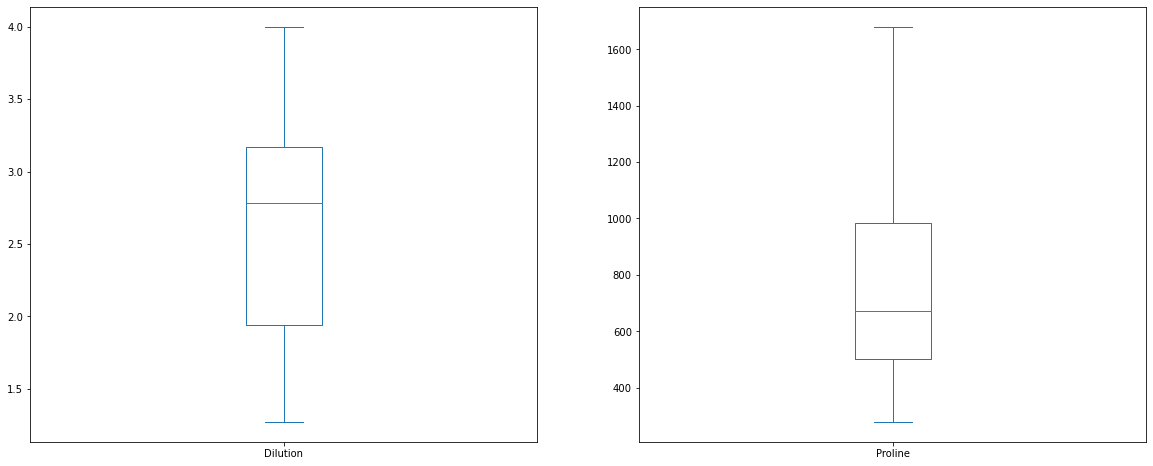

In [15]:
df.iloc[:,[11,12]].plot(kind='box',figsize=(20,8),fontsize=10,subplots=True,sharex=False)

Malic, Ash , Alcalinity ,magnecium ,color,hue this variables are having fiew outliars.

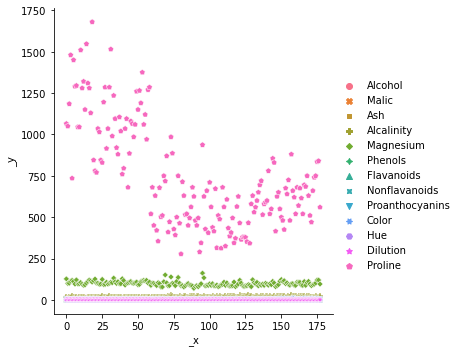

In [16]:
sns.relplot(data=df)

# scaling

In [17]:
wine_scaled=scale(df)

wine_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [18]:
# checking pca for each variable

pca=PCA()

# fit the scaled data

pca_ev=pca.fit_transform(wine_scaled)

# PCA for each variable

In [19]:
pca_ev

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

# DIMENSIONALITY REDUCTION upto 3 VARIABLLES

In [20]:
pca=PCA(n_components=3)
pca_values=pca.fit_transform(wine_scaled)

In [21]:
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [22]:
 df_1= pd.DataFrame(pca_values, columns = ['PCA1','PCA2','PCA3'])

In [23]:
df_1.head()

,PCA1,PCA2,PCA3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


# VARIANCE CAPTURED BY EACH PCA

In [24]:
from sklearn.decomposition import PCA

In [25]:
var=pca.explained_variance_ratio_
print(var)

[0.36198848 0.1920749  0.11123631]


In [26]:
#only 66% of data covered in 3 PCA

In [27]:
df_1

,PCA1,PCA2,PCA3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [28]:
df_1['PCA1']

0      3.316751
1      2.209465
2      2.516740
3      3.757066
4      1.008908
         ...   
173   -3.370524
174   -2.601956
175   -2.677839
176   -2.387017
177   -3.208758
Name: PCA1, Length: 178, dtype: float64

C:\Users\ABC\AppData\Local\Temp\ipykernel_5464\840910426.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


<function matplotlib.pyplot.show(close=None, block=None)>

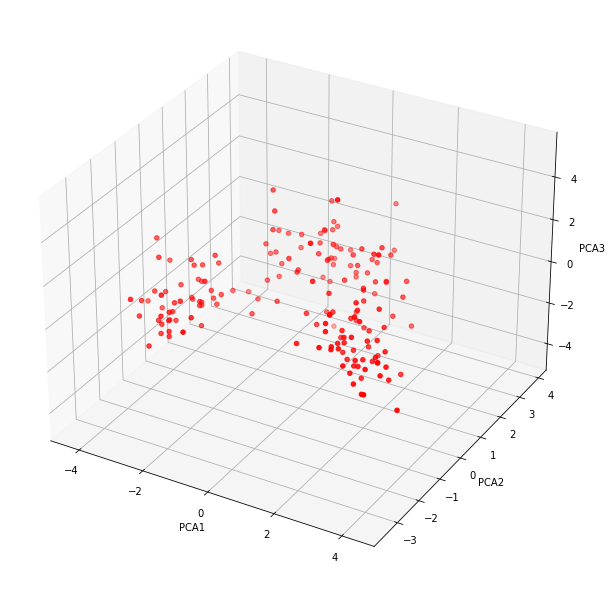

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

x= list(df_1['PCA1'])
y= list(df_1['PCA2'])
z=list(df_1['PCA3'])

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')


ax.scatter(x,y,z,c='red',marker = 'o',cmap='crest')

plt.show

<AxesSubplot:>

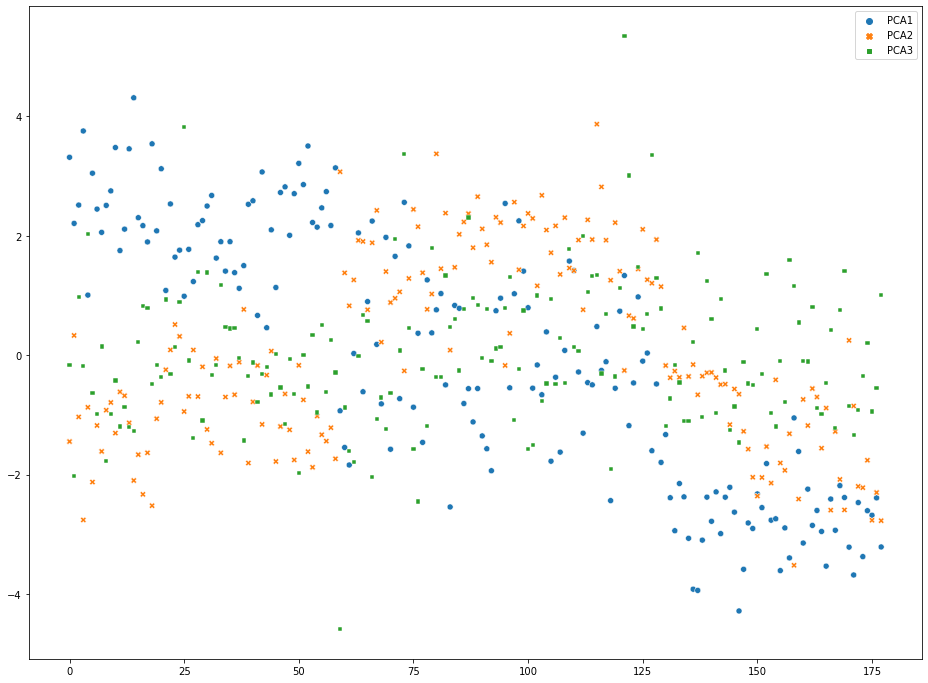

In [30]:
# Visualization of PCAs
import seaborn as sns
fig=plt.figure(figsize=(16,12))
sns.scatterplot(data=df_1)

In [31]:
w=pd.read_csv(r"C:\Users\ABC\Downloads\wine.csv")

In [32]:
df_1.describe()

,PCA1,PCA2,PCA3
count,1.780000e+02,1.780000e+02,1.780000e+02
mean,-1.072800e-16,-1.447032e-16,-4.740278e-17
std,2.175417e+00,1.584639e+00,1.205920e+00
min,-4.280639e+00,-3.515090e+00,-4.585064e+00
25%,-2.172762e+00,-1.233675e+00,-8.311875e-01
50%,6.051146e-02,-2.620302e-01,-1.416121e-01
75%,2.001293e+00,1.398300e+00,7.600610e-01
max,4.312784e+00,3.871784e+00,5.345388e+00


In [33]:
from sklearn.preprocessing import scale 
from sklearn.cluster import KMeans

# initially we can not assume or select no. of cluster for k mean clustering so we check for wcss(within cluster sum squared )and silhoette score 

In [34]:
# checking for random n-cluster = 6 
wcss=[]

kmeans=KMeans(n_clusters=6, random_state=42)
kmeans.fit(wine_scaled)

wcss.append(kmeans.inertia_)

In [35]:
wcss


[1042.3872037251417]

In [36]:
# select range for n = 1 to 10 and check for wcss for the cluster
wcss=[]
for i in range (1,10):
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(wine_scaled)

    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [37]:
wcss

[2314.0000000000005,
 1659.0079672511501,
 1277.928488844642,
 1175.7051928197118,
 1104.8616839625317,
 1042.3872037251417,
 988.0533283180055,
 940.708165089653,
 902.0783170433883]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


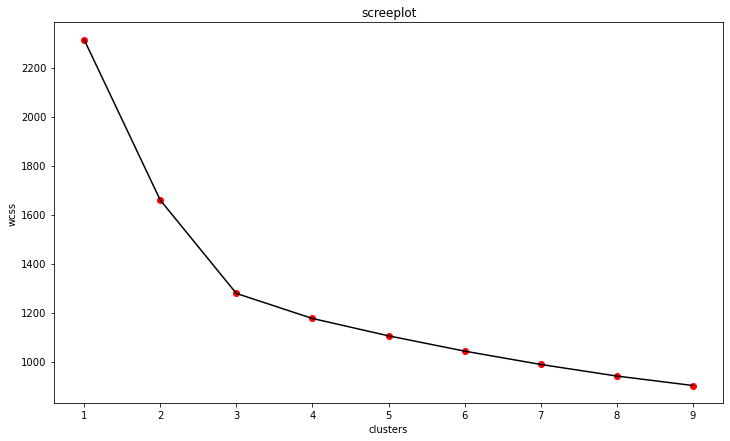

In [38]:
# potting elbow plot for wcss vs n_cluster to find no. of cluster  by visual method.
wcss=[]
for i in range (1,10):
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(wine_scaled)

    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,7))   

plt.plot(range(1,10),wcss,color = 'black')
plt.scatter(range(1,10),wcss,color='red')

plt.title('screeplot')
plt.xlabel('clusters')
plt.ylabel ('wcss')
plt.show()

where the wcss change drastically and then not deeps too much , which is the best no. of cluster near is n = 3 wcss not decrease further so we can choose this no, as n

In [39]:
from yellowbrick.cluster import KElbowVisualizer

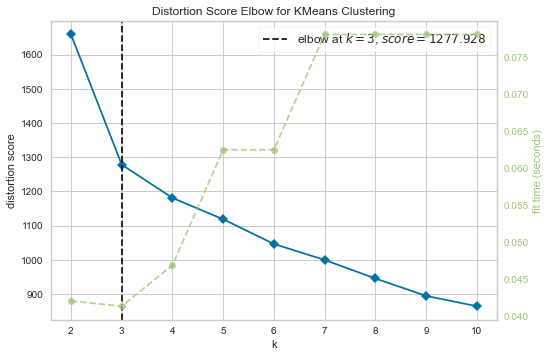

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
elbow=KElbowVisualizer(KMeans(),k=10)
elbow.fit(wine_scaled)
elbow.show()

checking by silhouette score method

In [41]:
from sklearn.metrics import silhouette_score

In [42]:
# With the elbow method, the ideal number of clusters to use was 8.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(wine_scaled)
    sil_score1= silhouette_score(wine_scaled, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.26831340971052126
For n_clusters = 3 The average silhouette_score is : 0.28594199657074876
For n_clusters = 4 The average silhouette_score is : 0.25173343011696475
For n_clusters = 5 The average silhouette_score is : 0.23187479572412723
For n_clusters = 6 The average silhouette_score is : 0.23964277899912415
For n_clusters = 7 The average silhouette_score is : 0.19771245159106143
For n_clusters = 8 The average silhouette_score is : 0.133114891253478
For n_clusters = 9 The average silhouette_score is : 0.14035373736325835


By scree or elbow plot we can take number of clusters are 3 also by KElbowVisualizer method gives n=3 
and by silhouette score method also max score is at n=3

SO WE CHOOSE n_cluster = 3

In [43]:
from sklearn.cluster import KMeans
wine_cl=KMeans(n_clusters=3,random_state=42)
wine_cl.fit(wine_scaled)

KMeans(n_clusters=3, random_state=42)

In [44]:
wine_cl.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [45]:
df_1["cluster"]=wine_cl.labels_

In [46]:
df_1

,PCA1,PCA2,PCA3,cluster
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,0
174,-2.601956,-1.757229,0.207581,0
175,-2.677839,-2.760899,-0.940942,0
176,-2.387017,-2.297347,-0.550696,0


In [47]:
final_cluster=df_1.sort_values("cluster")

In [48]:
final_cluster

,PCA1,PCA2,PCA3,cluster
177,-3.208758,-2.768920,1.013914,0
147,-3.582641,-1.272703,-0.110784,0
146,-4.280639,-0.649671,-1.458197,0
145,-2.625621,-0.563161,-0.855961,0
144,-2.209866,-1.160053,-1.245125,0
...,...,...,...,...
93,0.746666,2.312932,0.114680,2
92,-1.932556,1.559495,-0.089275,2
91,-1.564483,1.852215,0.781067,2
120,0.739622,1.408957,1.125345,2


In [49]:
from sklearn.metrics import silhouette_score

In [50]:
silhouette_score(wine_scaled,wine_cl.labels_)

0.2848589191898986

In [51]:
wine=pd.read_csv(r"C:\Users\ABC\Downloads\wine.csv")
wine['cluster']=wine_cl.labels_
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [52]:
#no. of rows in each cluster 
wine.cluster.value_counts()

2    65
1    62
0    51
Name: cluster, dtype: int64

In [53]:
wine.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

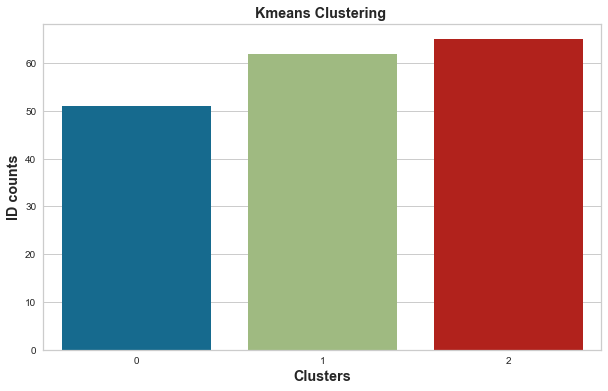

In [54]:
# count plot for cluster
plt.figure(figsize=(10,6))
sns.countplot(x='cluster', data = wine)
plt.title('Kmeans Clustering ',fontsize='large',fontweight='bold')
plt.xlabel('Clusters', fontsize='large', fontweight='bold')
plt.ylabel('ID counts', fontsize='large', fontweight='bold')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

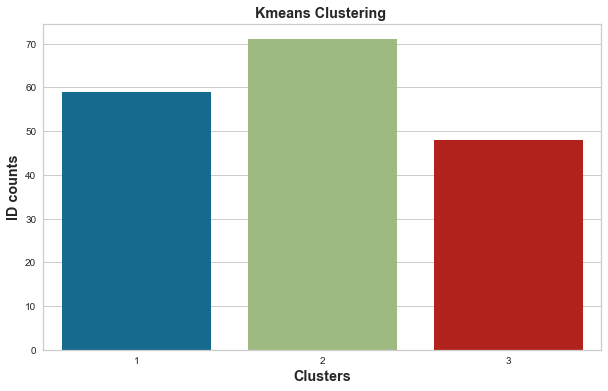

In [55]:
# count plot for cluster 
plt.figure(figsize=(10,6))
sns.countplot(x='Type', data = wine)
plt.title('Kmeans Clustering ',fontsize='large',fontweight='bold')
plt.xlabel('Clusters', fontsize='large', fontweight='bold')
plt.ylabel('ID counts', fontsize='large', fontweight='bold')
plt.show

# clusters are not exactly same but they are too identical

# MEAN TABLE WITH 3 CLUSTER 

In [56]:
table=wine.groupby('cluster').agg(['mean'])
table

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,,,,,
0,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
2,2.000000,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


# from above table ,we can easily segregate new independant point by comparing this 3 cluster variable values. 

# hierarchical clustering

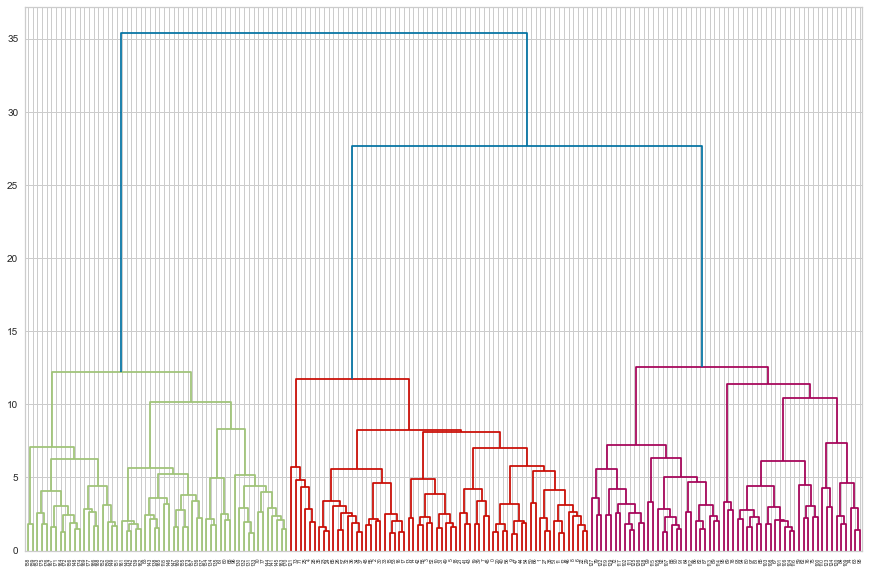

In [57]:
# clustering by using dendogram method= ward
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(15,10))
dendrogram=sch.dendrogram(sch.linkage(wine_scaled, method='ward'))

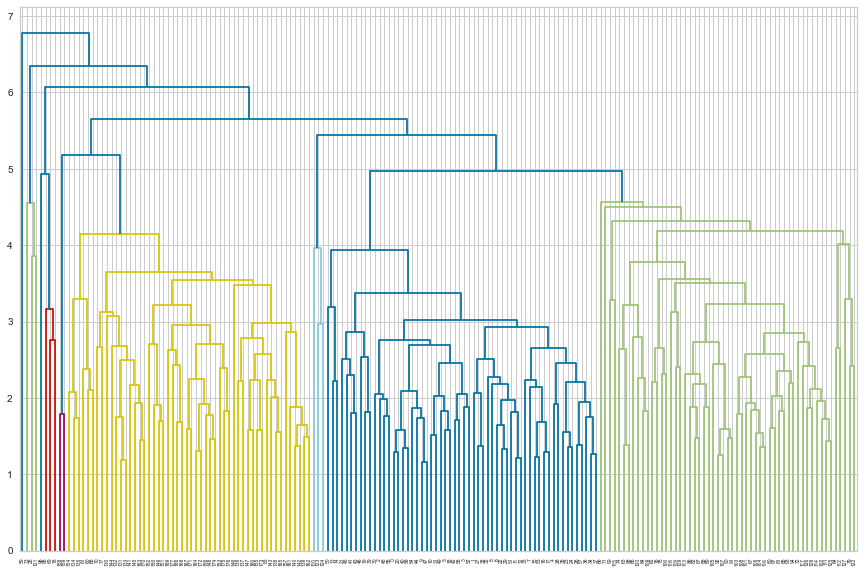

In [58]:
# clustering by using dendogram method= average
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(15,10))
dendrogram=sch.dendrogram(sch.linkage(wine_scaled, method='average'))

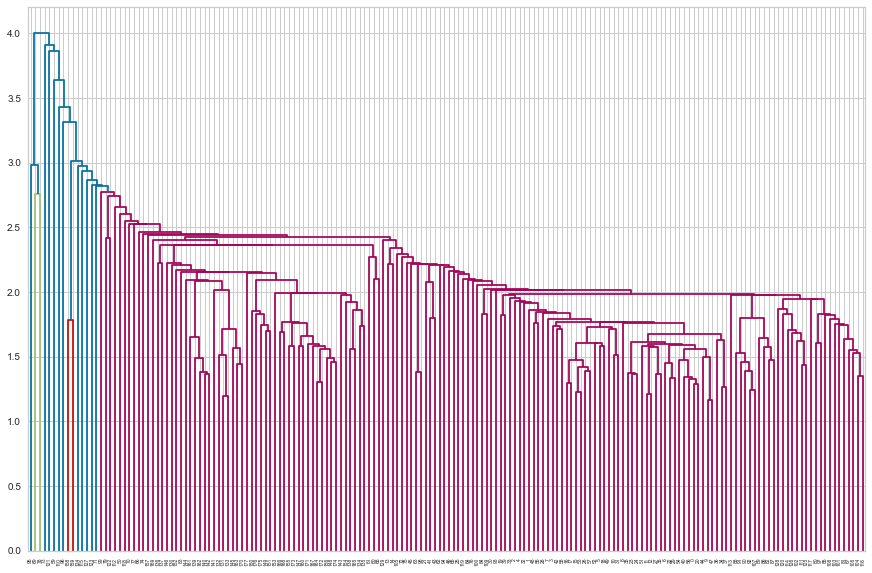

In [59]:
# clustering by using dendogram method=single
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(15,10))
dendrogram=sch.dendrogram(sch.linkage(wine_scaled, method='single'))

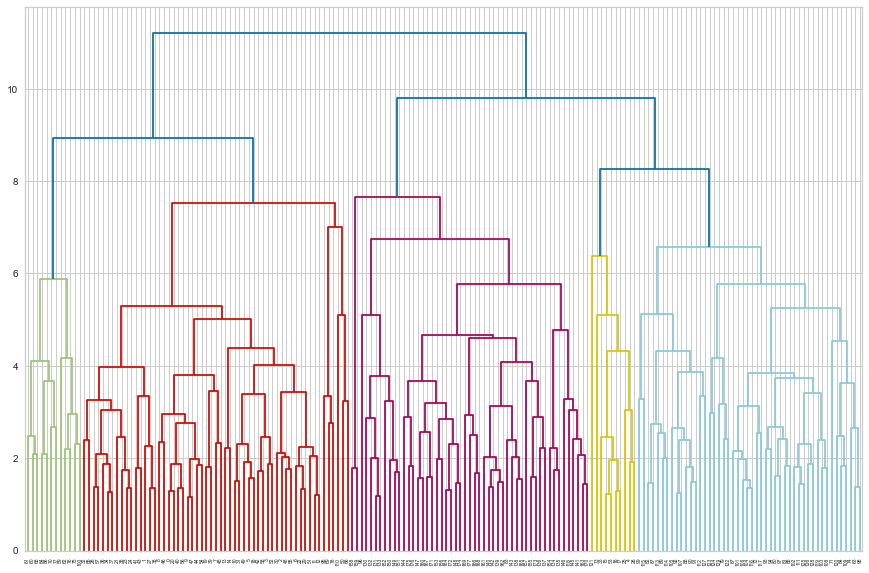

In [60]:
# clustering by using dendogram method= complete
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(15,10))
dendrogram=sch.dendrogram(sch.linkage(wine_scaled, method='complete'))

one of the most commaon drawback of heirarichal clustering is it dimensionaly cursed,it cannot handle large data, dendograms required lots of space to cluster the dataset

from above heirarchi cluster diagram we assume , best no. of cluster by looking most lenghthy vertical line without cuts by any horizantal line is showing 3 (n=3)

but we dont know the exact value of no. of clusters , so we check for best no. of cluster, linkage method and there silhouette score. choose the cluster no.and linkage who has maximum silhouette score

In [61]:
from sklearn.metrics import silhouette_score
# always start number from 2 as there no any cluster with 1 
n_clusters = [2,3,4,5,6,7,8]  

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) 
        hie_labels1 = hie_cluster1.fit_predict(wine_scaled)
        silhouette_score1 = silhouette_score(wine_scaled, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.26701317712722306
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.16186821075824515
For n_clusters = 2 The average silhouette_score with linkage- average : 0.25910607362654126
For n_clusters = 2 The average silhouette_score with linkage- single : 0.2224506072765093

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.2774439826952266
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.20378689690677743
For n_clusters = 3 The average silhouette_score with linkage- average : 0.15752526243774145
For n_clusters = 3 The average silhouette_score with linkage- single : 0.18273797160972796

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.22583665933475802
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.19382526203175696
For n_clusters = 4 The average silhouette_score with linkage- average : 0.14900318238951

# here we can clearly say that , with n_cluster = 3 has maximum no. of silhouette score with 28 %

In [62]:
#hierarchi model
hc=AgglomerativeClustering(n_clusters=3 ,affinity = 'euclidean', linkage = 'ward')

In [63]:
#fitting the model 
hc.fit(wine_scaled)
# predict the cluster 

wine_c=hc.fit_predict(wine_scaled)
wine_c

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [64]:
wine_h=pd.read_csv(r"C:\Users\ABC\Downloads\wine.csv")
wine_h['heirarchi_cluster']=wine_cl.labels_
wine_h

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,heirarchi_cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


# MEAN TABLE WITH 3 CLUSTER 

In [65]:
table=wine_h.groupby('heirarchi_cluster').agg(['mean'])
table

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
heirarchi_cluster,,,,,,,,,,,,,,
0,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
2,2.000000,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


In [66]:
wine_h.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [67]:
wine_h.heirarchi_cluster.value_counts()

2    65
1    62
0    51
Name: heirarchi_cluster, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

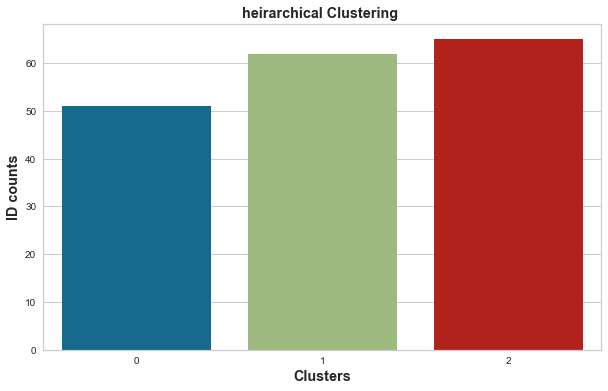

In [68]:
# count plot for cluster
plt.figure(figsize=(10,6))
sns.countplot(x='heirarchi_cluster', data = wine_h)
plt.title('heirarchical Clustering ',fontsize='large',fontweight='bold')
plt.xlabel('Clusters', fontsize='large', fontweight='bold')
plt.ylabel('ID counts', fontsize='large', fontweight='bold')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

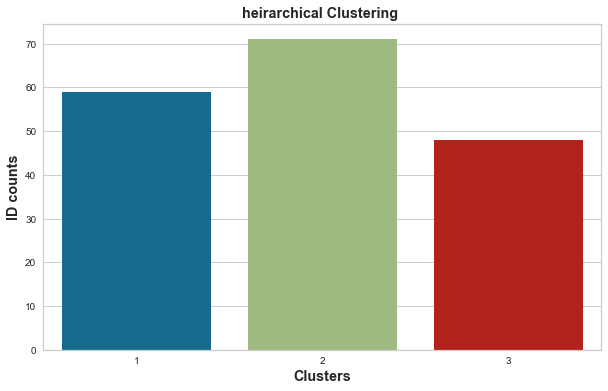

In [69]:
# count plot for cluster
plt.figure(figsize=(10,6))
sns.countplot(x='Type', data = wine_h)
plt.title('heirarchical Clustering ',fontsize='large',fontweight='bold')
plt.xlabel('Clusters', fontsize='large', fontweight='bold')
plt.ylabel('ID counts', fontsize='large', fontweight='bold')
plt.show

 we get exactly same cluster and there count with heirarchical clustering as well as  kmean clusterng. from which we can easily classify new data point by refer to the mean table

# CONCLUSION

Firstly we check the outliars with the help oh histogram and kernal density plot. Then we check for correlation between differant variables. Then we scale the data for avoid noise from the data. 

we reduce the dimension of data using PRINCIPAL COMPONENT ANALYSIS upto 3 variables. keeping about 66% of information from core data. Then we appply KMEAN and HEIRARCHICAL clustering and choose no. of cluster = 3, by elbow plot as well as silhouette score method.

we get identical no.of rows in cluster  compared to given target variable (Type).
analysis determined the quantities of 13 constituents found in each of the three types of wines.

Hence we can easily segregate new data (row) with quantities of 13 constituents found in each of the three types of wines.
